## 1. Importer les bibliothèques Python 

In [1]:
import pandas as pd 
import numpy as  np 
import matplotlib.pyplot as plt 
import seaborn as sn 
from sklearn.linear_model import  LinearRegression, Ridge,Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV, cross_val_score
from sklearn.metrics import r2_score,root_mean_squared_error,mean_squared_error
from sklearn.compose import ColumnTransformer
from ydata_profiling import ProfileReport
from sklearn.pipeline import Pipeline

## Data reading

In [2]:
data=pd.read_table('prostate_dataset.txt')

In [4]:
data.head()

,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [5]:
data.shape

(97, 11)

## 2. Supprimer les colonnes "col" et "train" du jeu de données.

In [5]:
df=data.drop(columns=['col','train'],axis=1)
df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


## 3. Nettoyer les données si nécessaire

In [6]:
df.isnull().sum()

lcavol     0
lweight    0
age        0
lbph       0
svi        0
lcp        0
gleason    0
pgg45      0
lpsa       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   svi      97 non-null     int64  
 5   lcp      97 non-null     float64
 6   gleason  97 non-null     int64  
 7   pgg45    97 non-null     int64  
 8   lpsa     97 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 6.9 KB


<Axes: ylabel='count'>

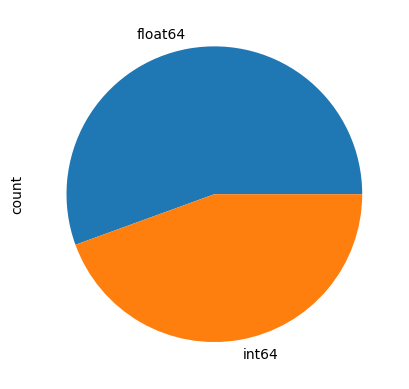

In [8]:
df.dtypes.value_counts().plot.pie()

### Statistiques descriptives uni-variées et bi-variées

In [9]:
df.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


In [14]:
from ydata_profiling import ProfileReport

profile = ProfileReport(
    df,
    title="Prostate_profiling",
    correlations={
        "pearson": {"calculate": True},           
        "spearman": {"calculate": True},          
        "kendall": {"calculate": False},          
        "phi_k": {"calculate": True},             
        "cramers": {"calculate": True},           
    },
    interactions={
        "continuous": True,    
        "targets": []          
    },
    explorative=True  
)


profile.to_notebook_iframe()
profile.to_file("Prostate_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Conclusion :  
- Presence de variables categoriques : gleason,svi
- Beaucoup de variable corrélées  : lcavol,lcp,lpsa,svi
- Certaines colones pourront  plustard etre suprimées

In [59]:
df.columns

Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45',
       'lpsa'],
      dtype='object')

### 5. Séparer les variables explicatives de la variable à prédire (psa).

In [60]:
X=df.drop('lpsa',axis=1)
y=df['lpsa']

### 4. Standardiser les données explicatives. 

In [61]:
numeric_cols = ['lcavol', 'lweight', 'age', 'lbph', 'lcp']
preprocessor = ColumnTransformer(
    [('num', StandardScaler(), numeric_cols)],
    remainder='passthrough'
)


### 6. Diviser le jeu de données en deux ensembles : un ensemble d'entraînement et un ensemble de test.

In [62]:
x_train ,x_test ,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.20)

### 7. Entraîner un modèle de régression linéaire et évaluer sa performance sur l'ensemble de test.

In [63]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [64]:
model.fit(x_train,y_train)

c:\Users\Falleiz\Downloads\Machine Learning\venv\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['lcavol', 'lweight', 'age',
                                                   'lbph', 'lcp'])])),
                ('regressor', LinearRegression())])

In [65]:

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [66]:
print("=== PERFORMANCE DU MODÈLE ===")
print(f"{'':<15} {'Train':>8} {'Test':>8}")
print(f"{'─' * 32}")
print(f"R²{'':<12} {r2_train:>8.4f} {r2_test:>8.4f}")
print(f"RMSE{'':<11} {rmse_train:>8.4f} {rmse_test:>8.4f}")

=== PERFORMANCE DU MODÈLE ===
                   Train     Test
────────────────────────────────
R²               0.6300   0.7575
RMSE              0.6895   0.5891


### 8. Entraîner un modèle de régression Ridge avec un coefficient de régularisation λ=2.14 et évaluer sa performance sur l'ensemble de test. 

In [68]:
model_ridge = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=2.14))
])

In [69]:
model_ridge.fit(x_train,y_train)

c:\Users\Falleiz\Downloads\Machine Learning\venv\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['lcavol', 'lweight', 'age',
                                                   'lbph', 'lcp'])])),
                ('regressor', Ridge(alpha=2.14))])

In [70]:

y_pred_train = model_ridge.predict(x_train)
y_pred_test = model_ridge.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [71]:
print("=== PERFORMANCE DU MODÈLE ===")
print(f"{'':<15} {'Train':>8} {'Test':>8}")
print(f"{'─' * 32}")
print(f"R²{'':<12} {r2_train:>8.4f} {r2_test:>8.4f}")
print(f"RMSE{'':<11} {rmse_train:>8.4f} {rmse_test:>8.4f}")

=== PERFORMANCE DU MODÈLE ===
                   Train     Test
────────────────────────────────
R²               0.6270   0.7580
RMSE              0.6923   0.5884


### 9. Utiliser la validation croisée pour déterminer la valeur optimale de λ. Évaluer la performance du nouveau modèle.

In [77]:
param_grid = {
    'regressor__alpha': np.logspace(-4, 4, 50)  
}

# 3. GridSearchCV avec validation croisée (5-fold)
grid_search = GridSearchCV(
    model_ridge,
    param_grid,
    cv=5,                   
    scoring='r2',            
    n_jobs=-1,               
    return_train_score=True
)

In [78]:
grid_search.fit(x_train, y_train)

# 5. Meilleur alpha trouvé
best_alpha = grid_search.best_params_['regressor__alpha']
print(f"\nMEILLEUR α (lambda) trouvé : {best_alpha:.6f}")

# 6. Meilleur modèle
best_model = grid_search.best_estimator_


MEILLEUR α (lambda) trouvé : 0.000100


In [79]:

y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [80]:
print("=== PERFORMANCE DU MODÈLE ===")
print(f"{'':<15} {'Train':>8} {'Test':>8}")
print(f"{'─' * 32}")
print(f"R²{'':<12} {r2_train:>8.4f} {r2_test:>8.4f}")
print(f"RMSE{'':<11} {rmse_train:>8.4f} {rmse_test:>8.4f}")

=== PERFORMANCE DU MODÈLE ===
                   Train     Test
────────────────────────────────
R²               0.6300   0.7575
RMSE              0.6895   0.5891


### 10. Entraîner un modèle de régression Lasso avec λ=0.08 et évaluer sa performance sur l'ensemble de test.

In [82]:

model_lasso = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.08, random_state=42))  
])

model_lasso.fit(x_train, y_train)


y_pred_train = model_lasso.predict(x_train)
y_pred_test = model_lasso.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("=== PERFORMANCE DU MODÈLE LASSO (λ = 0.08) ===")
print(f"{'':<15} {'Train':>8} {'Test':>8}")
print(f"{'─' * 32}")
print(f"R²{'':<12} {r2_train:>8.4f} {r2_test:>8.4f}")
print(f"RMSE{'':<11} {rmse_train:>8.4f} {rmse_test:>8.4f}")

=== PERFORMANCE DU MODÈLE LASSO (λ = 0.08) ===
                   Train     Test
────────────────────────────────
R²               0.5679   0.6831
RMSE              0.7451   0.6734


### 11. Utiliser la validation croisée pour déterminer la valeur optimale de λ. Évaluer la performance du nouveau modèle. 

In [83]:

model_lasso_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(random_state=42, max_iter=10000))
])


param_grid = {
    'regressor__alpha': np.logspace(-4, 1, 50)  
}


grid_search_lasso = GridSearchCV(
    model_lasso_cv,
    param_grid,
    cv=5,
    scoring='r2',           
    n_jobs=-1,
    return_train_score=True
)


grid_search_lasso.fit(x_train, y_train)


best_lambda = grid_search_lasso.best_params_['regressor__alpha']
print(f"\nMEILLEUR λ (alpha) pour Lasso : {best_lambda:.6f}")


best_lasso = grid_search_lasso.best_estimator_


y_pred_train = best_lasso.predict(x_train)
y_pred_test = best_lasso.predict(x_test)


r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))


print("\n=== PERFORMANCE DU MODÈLE LASSO (λ optimal) ===")
print(f"{'':<15} {'Train':>8} {'Test':>8}")
print(f"{'─' * 32}")
print(f"R²{'':<12} {r2_train:>8.4f} {r2_test:>8.4f}")
print(f"RMSE{'':<11} {rmse_train:>8.4f} {rmse_test:>8.4f}")


MEILLEUR λ (alpha) pour Lasso : 0.000100

=== PERFORMANCE DU MODÈLE LASSO (λ optimal) ===
                   Train     Test
────────────────────────────────
R²               0.6300   0.7576
RMSE              0.6895   0.5890


### 12. Entraîner un modèle de régression Elastic Net avec les valeurs optimales de λ et de α, puis évaluer sa performance sur l'ensemble de test. 

In [85]:
model_en = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(random_state=42, max_iter=10000))
])

param_grid = {
    'regressor__alpha': np.logspace(-4, 1, 20),        
    'regressor__l1_ratio': np.linspace(0.1, 1.0, 10)   
    
}


grid_search_en = GridSearchCV(
    model_en,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    return_train_score=True
)

grid_search_en.fit(x_train, y_train)


best_lambda = grid_search_en.best_params_['regressor__alpha']
best_alpha = grid_search_en.best_params_['regressor__l1_ratio']
print(f"\nMEILLEUR λ (alpha) : {best_lambda:.6f}")
print(f"MEILLEUR α (l1_ratio) : {best_alpha:.3f}")

best_en = grid_search_en.best_estimator_


y_pred_train = best_en.predict(x_train)
y_pred_test = best_en.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))


print("\n=== PERFORMANCE ELASTIC NET (optimal) ===")
print(f"{'':<15} {'Train':>8} {'Test':>8}")
print(f"{'─' * 32}")
print(f"R²{'':<12} {r2_train:>8.4f} {r2_test:>8.4f}")
print(f"RMSE{'':<11} {rmse_train:>8.4f} {rmse_test:>8.4f}")


MEILLEUR λ (alpha) : 0.000100
MEILLEUR α (l1_ratio) : 0.400

=== PERFORMANCE ELASTIC NET (optimal) ===
                   Train     Test
────────────────────────────────
R²               0.6300   0.7575
RMSE              0.6895   0.5890


### 13. Intepréter les résultats trouvés  


Confère rapport 

### 14. À l’aide du modèle choisi, prédire la quantité d'expression de l'antigène (lpsa) pour un patient avec les caractéristiques suivantes: 

In [ ]:
nouveau_patient = pd.DataFrame([{
    'lcavol': 2.8,
    'lweight': 3.0,
    'age': 70,
    'lbph': -1.4,
    'svi': 1,
    'lcp': 1.5,
    'gleason': 7,
    'pgg45': 60
}], columns=X.columns) 

In [87]:
lpsa_pred = best_en.predict(nouveau_patient)[0]
lpsa_pred

3.291855104315581

### 15. Sauvegarder le modèle final dans un format appropri 

In [ ]:
import joblib
joblib.dump(best_en,'final_model.pkl')

['final_model.pkl']